In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-mpg-fuel-efficiency-prediction/Reduced-Data.csv


## ----------------------------------  Predict Fuel Efficiency  ----------------------------

## Importing Required Libraries

In [7]:
import warnings
import pickle
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler,QuantileTransformer,StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.metrics import r2_score,mean_absolute_error
from xgboost import XGBRegressor

## Data Reading and PreProcessing

In [8]:
df = pd.read_csv('/kaggle/input/auto-mpg-fuel-efficiency-prediction/Reduced-Data.csv')

In [10]:
df.isna().sum()   #Checking for null values

r                            0
m (kg)                     425
Mt                      523557
Ewltp (g/km)             20891
Ft                           0
Fm                           1
ec (cm3)               1670374
ep (KW)                  35372
z (Wh/km)              8374652
Erwltp (g/km)          4966748
Fuel consumption       3183164
Electric range (km)    8398594
dtype: int64

In [11]:
df.drop('r',inplace=True,axis=1)

In [12]:
df.head()

,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,Electric range (km)
0,1337.0,1446.0,126.0,lpg,B,999.0,74.0,NaN,1.70,7.8,NaN
1,1670.0,1782.0,125.0,petrol,H,2487.0,131.0,NaN,0.80,5.5,NaN
2,2044.0,2187.0,0.0,electric,E,NaN,221.0,172.0,NaN,NaN,440.0
3,1493.0,1576.0,135.0,petrol,M,1199.0,96.0,NaN,2.00,6.0,NaN
4,1649.0,1814.0,131.0,petrol,H,1598.0,132.0,NaN,0.59,5.8,NaN


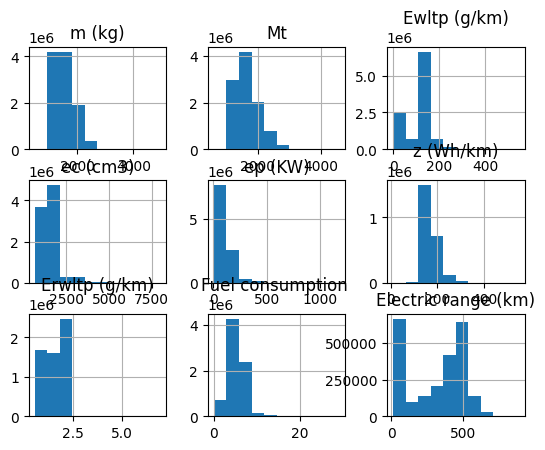

In [15]:
df.hist()   #Ploting histograms
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

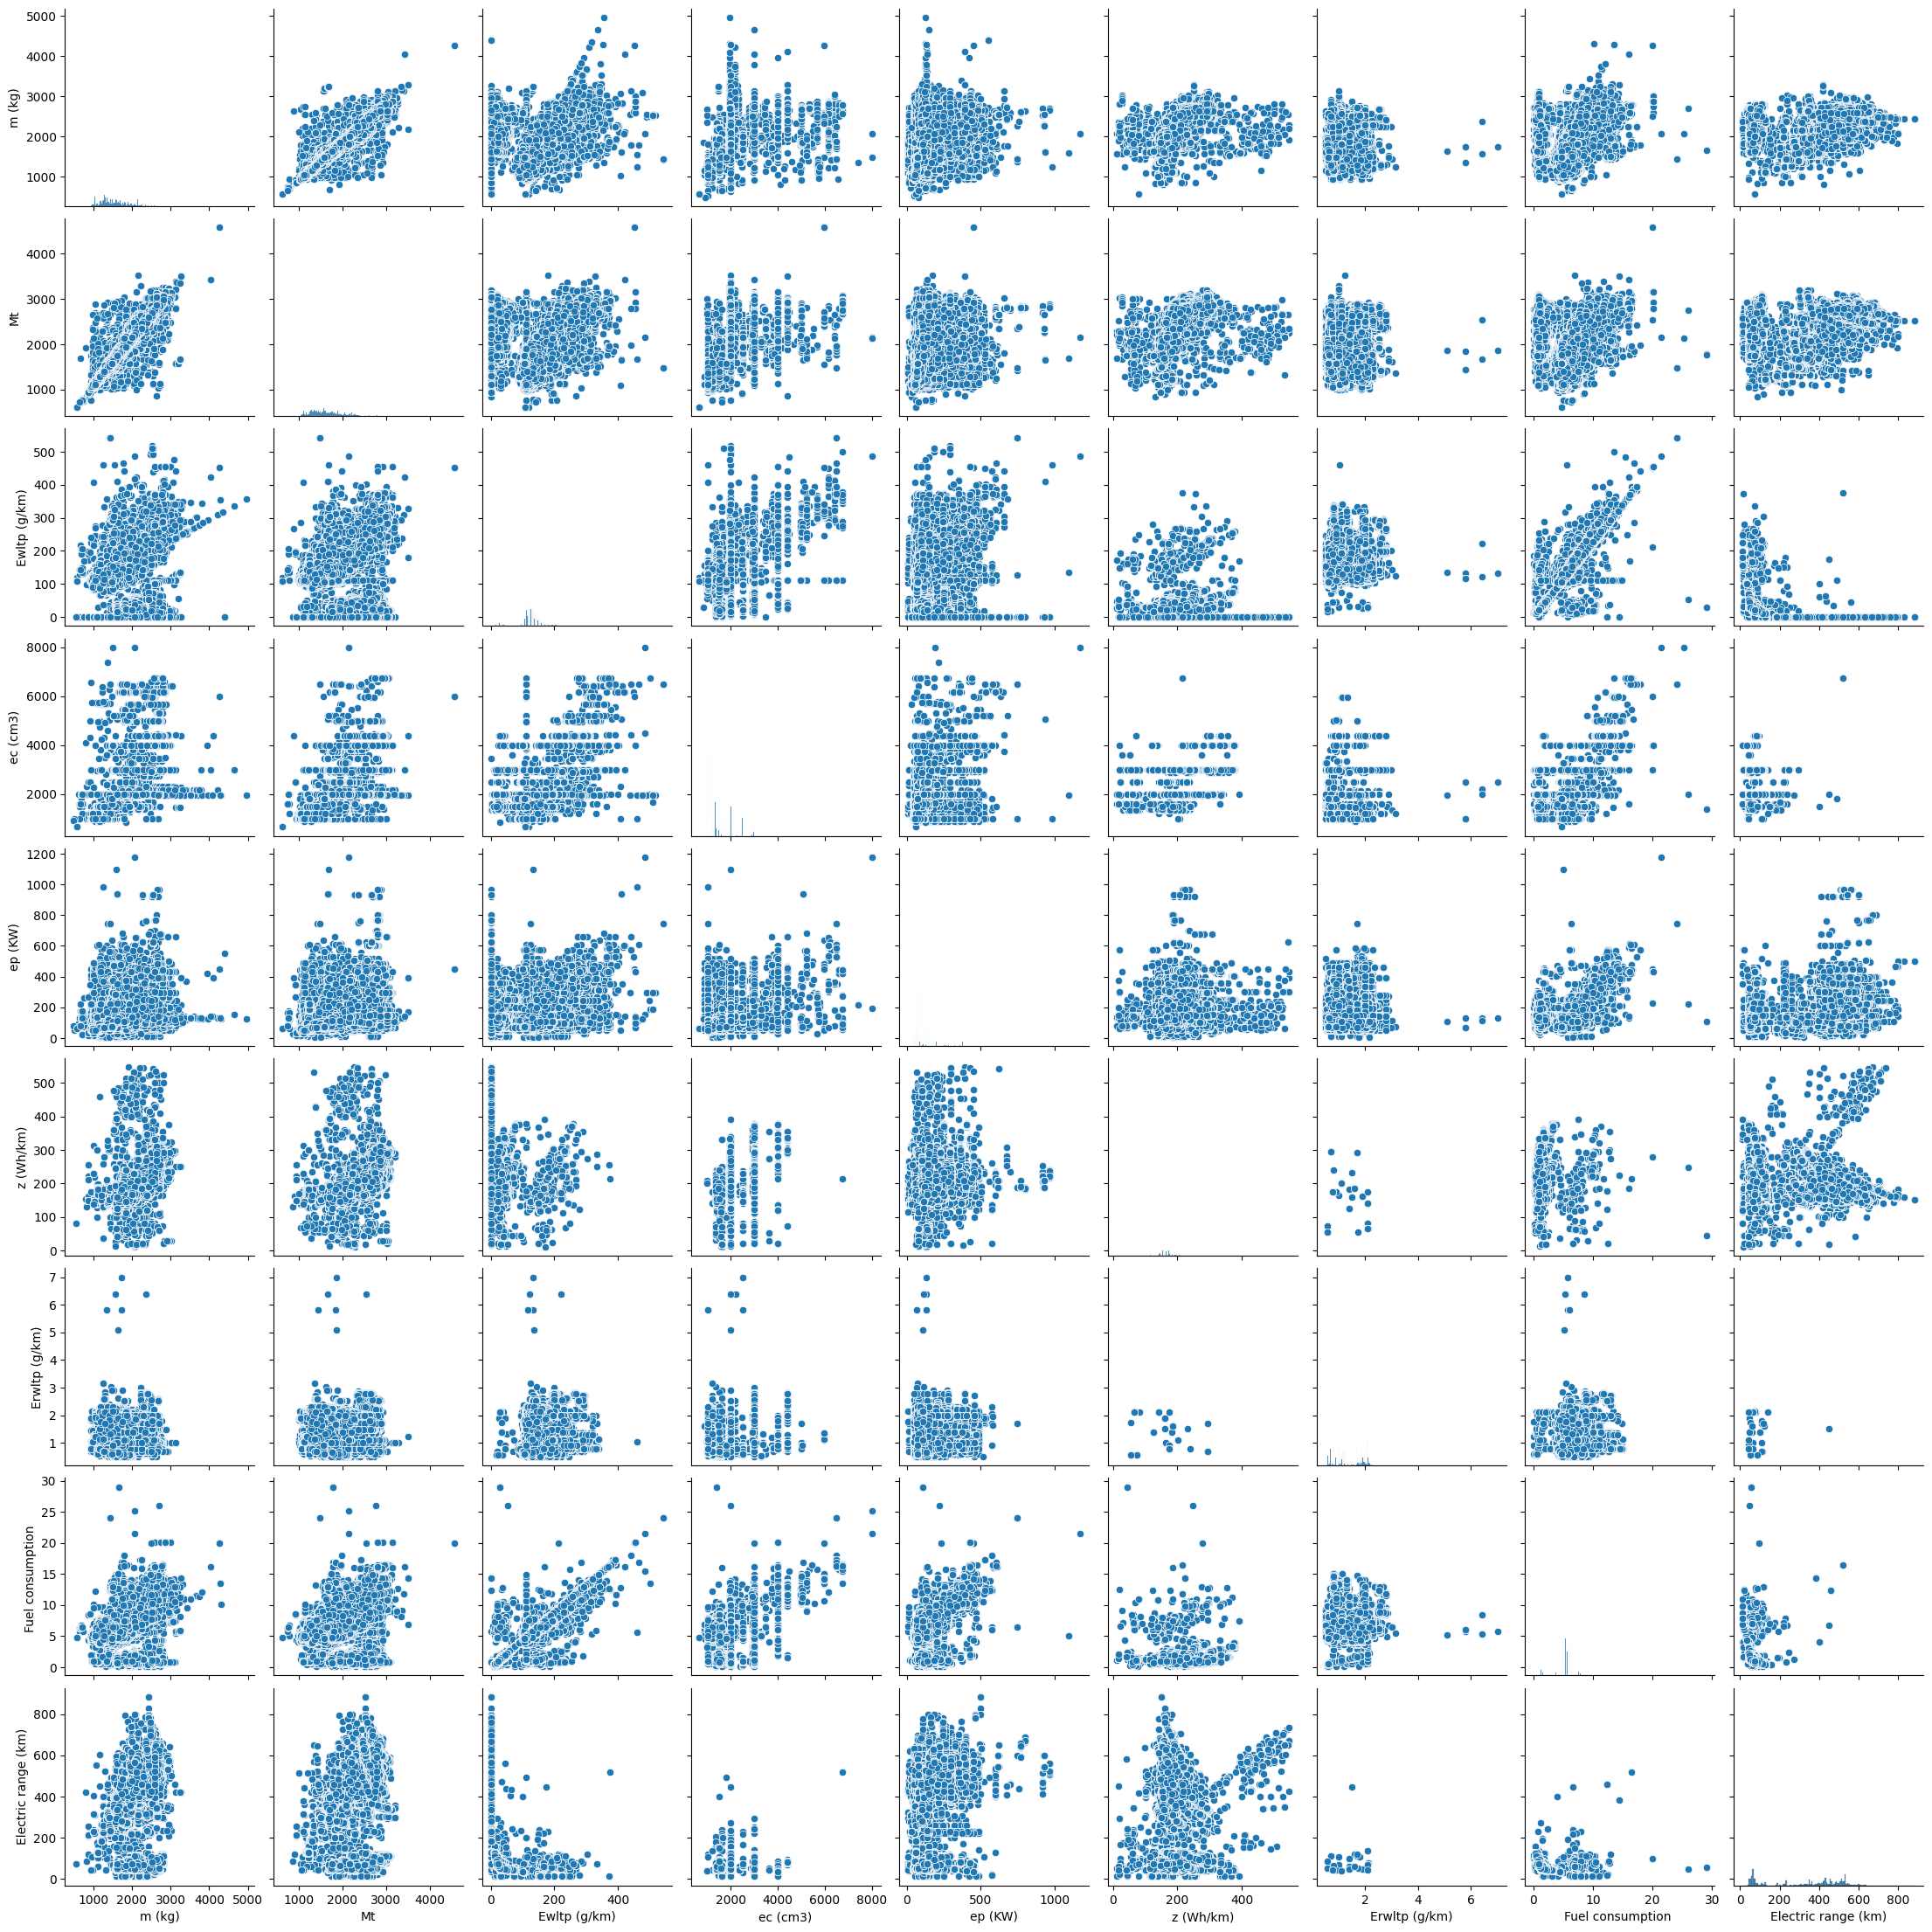

In [17]:
sns.pairplot(df)

In [14]:
df.shape

(10734656, 11)

In [15]:
df['Electric range (km)'].fillna(0,inplace=True)  #Fill null values

In [16]:
df.head()

,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,Electric range (km)
0,1337.0,1446.0,126.0,lpg,B,999.0,74.0,NaN,1.70,7.8,0.0
1,1670.0,1782.0,125.0,petrol,H,2487.0,131.0,NaN,0.80,5.5,0.0
2,2044.0,2187.0,0.0,electric,E,NaN,221.0,172.0,NaN,NaN,440.0
3,1493.0,1576.0,135.0,petrol,M,1199.0,96.0,NaN,2.00,6.0,0.0
4,1649.0,1814.0,131.0,petrol,H,1598.0,132.0,NaN,0.59,5.8,0.0


In [17]:
df.drop('z (Wh/km)',inplace=True,axis=1)

In [18]:
df.drop('Mt',inplace=True,axis=1) #dropping because its not of use its just a test mass we dont need it

In [19]:
df.drop('Ewltp (g/km)',axis=1,inplace=True)

In [20]:
df.drop('Erwltp (g/km)',inplace=True,axis=1) # this is emission reduction of CO2 using the catalyst etc we dont need it

In [21]:
df.isna().sum()

m (kg)                     425
Ft                           0
Fm                           1
ec (cm3)               1670374
ep (KW)                  35372
Fuel consumption       3183164
Electric range (km)          0
dtype: int64

In [22]:
df.shape

(10734656, 7)

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(7550972, 7)

1. m : mass
2. Ft : Fuel Type
3. Fm : Fuel Mode
4. ec : Engine capacity
5. ep : Engine Power
6. z  : Engine Energy consumptio
7. Electric Range if is electri : range

In [25]:
df.head()

,m (kg),Ft,Fm,ec (cm3),ep (KW),Fuel consumption,Electric range (km)
0,1337.0,lpg,B,999.0,74.0,7.8,0.0
1,1670.0,petrol,H,2487.0,131.0,5.5,0.0
3,1493.0,petrol,M,1199.0,96.0,6.0,0.0
4,1649.0,petrol,H,1598.0,132.0,5.8,0.0
5,1560.0,petrol,H,1987.0,112.0,5.2,0.0


In [26]:
df.shape

(7550972, 7)

In [27]:
X = df.drop('Fuel consumption ',axis=1)
y = df['Fuel consumption ']

#### Outlier Removal

In [28]:

for col in X.columns:
    if col !='Fm' and col !='Ft':
        Q1, Q3 = np.quantile(df[col], 0.25), np.quantile(df[col], 0.75)
        iqr = Q3 - Q1
        cut_off_range = 1.75 * iqr
        lower, upper = Q1 - cut_off_range, Q3 + cut_off_range
        df = df[(df[col] >= lower) & (df[col] <= upper)]

In [29]:
X = df.drop('Fuel consumption ',axis=1)
y = df['Fuel consumption ']

#### Pipeline

**Feature Enginnering**
1. Standardization and Quantile Transformation
2. OneHotEncoding
3. Model Training with Feature Selection

In [24]:
encoder_pipe = Pipeline(
steps=[
    ('encoder',OneHotEncoder(handle_unknown='ignore',drop='first'))
])



In [27]:
X.head()

,m (kg),Ft,Fm,ec (cm3),ep (KW),Electric range (km)
0,1337.0,lpg,B,999.0,74.0,0.0
1,1670.0,petrol,H,2487.0,131.0,0.0
3,1493.0,petrol,M,1199.0,96.0,0.0
4,1649.0,petrol,H,1598.0,132.0,0.0
5,1560.0,petrol,H,1987.0,112.0,0.0


In [28]:
scaling_pipe = Pipeline(steps=[
    ('Scaling',StandardScaler()),
    ('Transformer',QuantileTransformer())
])

In [29]:
df.head()

,m (kg),Ft,Fm,ec (cm3),ep (KW),Fuel consumption,Electric range (km)
0,1337.0,lpg,B,999.0,74.0,7.8,0.0
1,1670.0,petrol,H,2487.0,131.0,5.5,0.0
3,1493.0,petrol,M,1199.0,96.0,6.0,0.0
4,1649.0,petrol,H,1598.0,132.0,5.8,0.0
5,1560.0,petrol,H,1987.0,112.0,5.2,0.0


In [28]:
df.columns

Index(['m (kg)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'Fuel consumption ',
       'Electric range (km)'],
      dtype='object')

In [29]:

preprocess = ColumnTransformer(
    transformers=[
        ('cat',encoder_pipe,['Fm','Ft']),
        ('scale_trasform',scaling_pipe,['m (kg)','ec (cm3)','ep (KW)'])
    ]
)

In [32]:
df.head()

,m (kg),Ft,Fm,ec (cm3),ep (KW),Fuel consumption,Electric range (km)
0,1337.0,lpg,B,999.0,74.0,7.8,0.0
1,1670.0,petrol,H,2487.0,131.0,5.5,0.0
3,1493.0,petrol,M,1199.0,96.0,6.0,0.0
4,1649.0,petrol,H,1598.0,132.0,5.8,0.0
5,1560.0,petrol,H,1987.0,112.0,5.2,0.0


#### Exploratory Data Analysis

In [33]:
df['Ft'].value_counts()

Ft
petrol             4688623
diesel             1395471
lpg                 258694
e85                  46154
petrol/electric      26032
ng                    6815
diesel/electric        133
PETROL                  59
DIESEL                  17
LPG                      1
Name: count, dtype: int64

In [34]:
df['Fm'].value_counts()

Fm
M    4040341
H    2088917
B     259253
P      26165
F       7323
Name: count, dtype: int64

In [35]:
import seaborn.objects as so

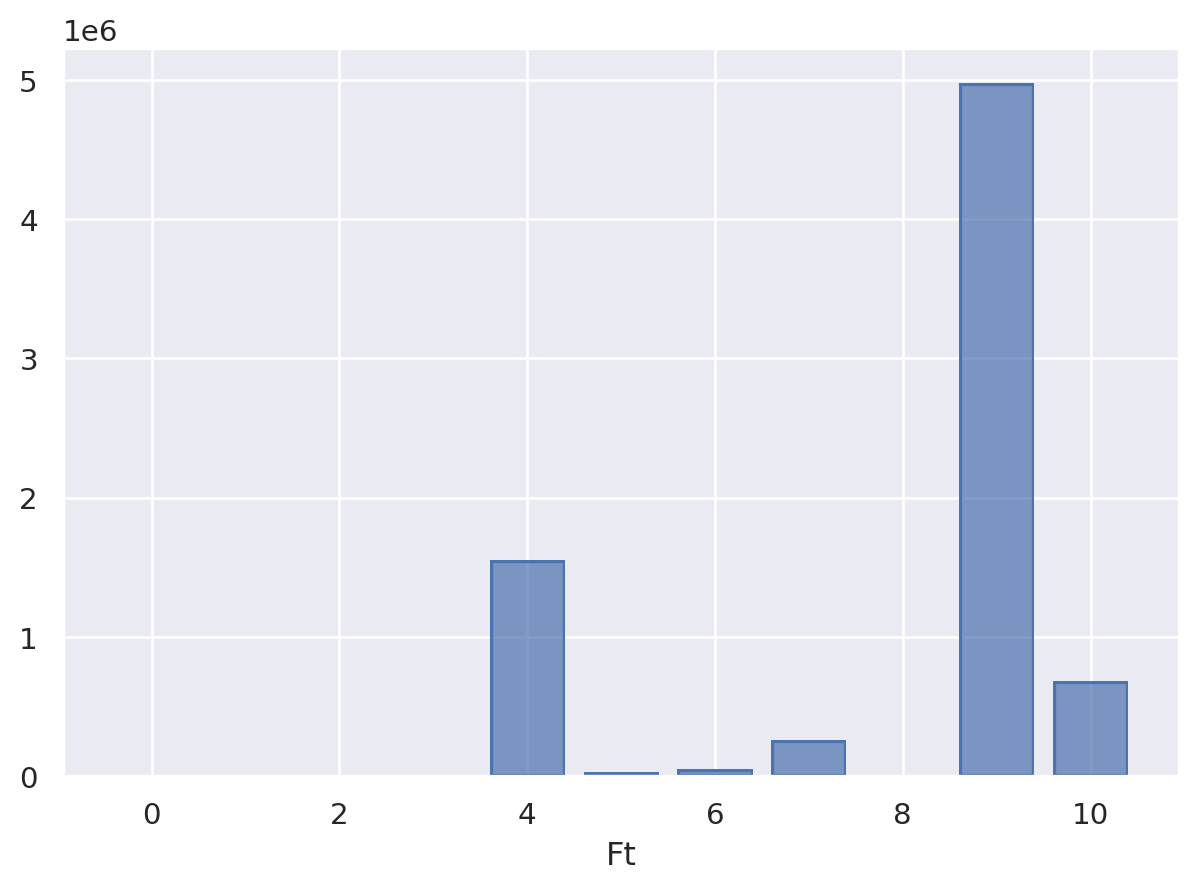

In [25]:
so.Plot(df,x='Ft').add(so.Bar(), so.Count())


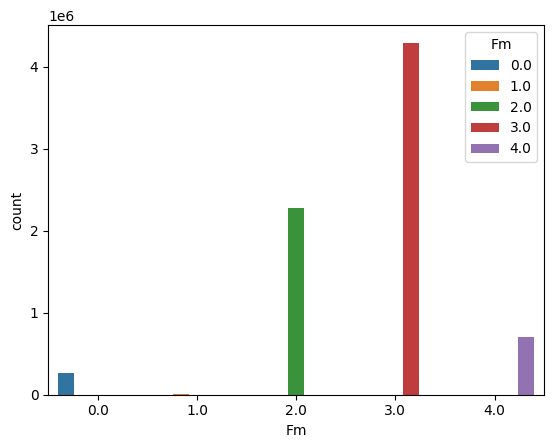

In [91]:
sns.countplot(df,x='Fm',hue='Fm')
plt.show()

<Axes: >

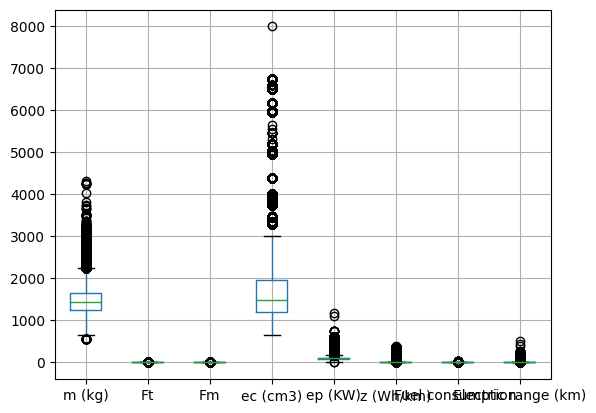

In [92]:
df.boxplot()

In [27]:
df.describe()

,m (kg),Ft,Fm,ec (cm3),ep (KW),Fuel consumption,Electric range (km)
count,7.550972e+06,7.550972e+06,7.550972e+06,7.550972e+06,7.550972e+06,7.550972e+06,7.550972e+06
mean,1.481844e+03,7.964257e+00,2.687224e+00,1.543563e+03,1.059520e+02,5.409906e+00,6.119286e+00
std,3.273783e+02,2.095772e+00,7.817183e-01,5.293588e+02,5.172205e+01,1.785300e+00,2.046945e+01
min,5.700000e+02,0.000000e+00,0.000000e+00,6.580000e+02,8.000000e+00,1.000000e-01,0.000000e+00
25%,1.250000e+03,9.000000e+00,2.000000e+00,1.197000e+03,7.400000e+01,4.900000e+00,0.000000e+00
50%,1.429000e+03,9.000000e+00,3.000000e+00,1.497000e+03,9.600000e+01,5.500000e+00,0.000000e+00
75%,1.650000e+03,9.000000e+00,3.000000e+00,1.968000e+03,1.160000e+02,6.100000e+00,0.000000e+00
max,4.312000e+03,1.000000e+01,4.000000e+00,7.993000e+03,1.177000e+03,2.900000e+01,5.200000e+02


In [36]:
import plotly.express as px



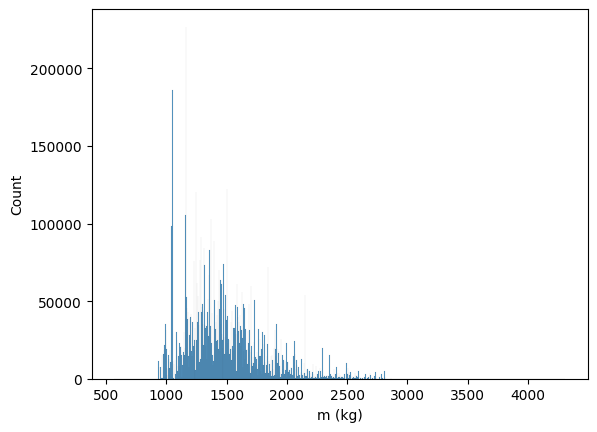

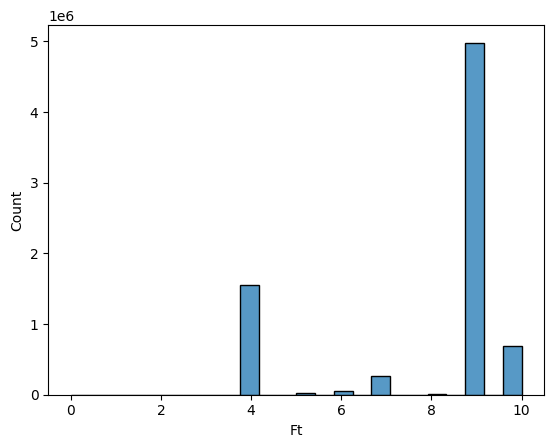

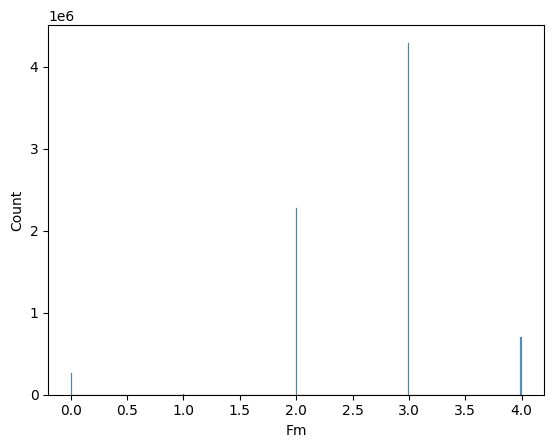

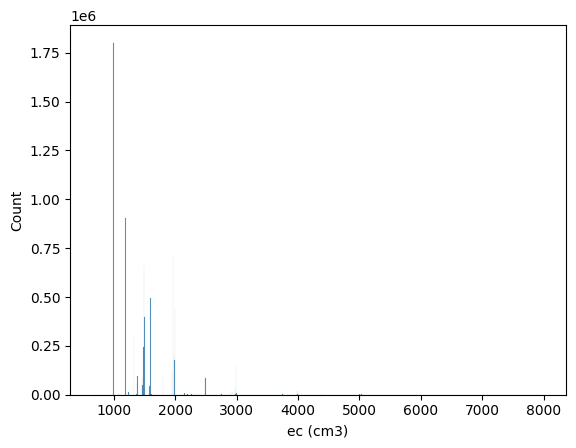

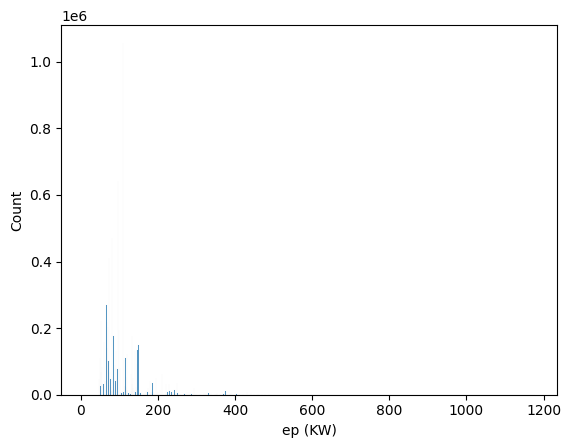

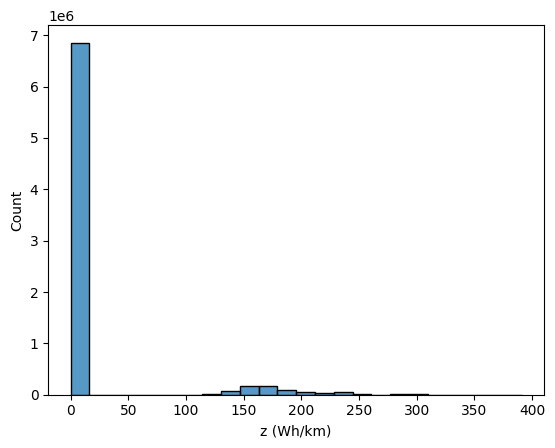

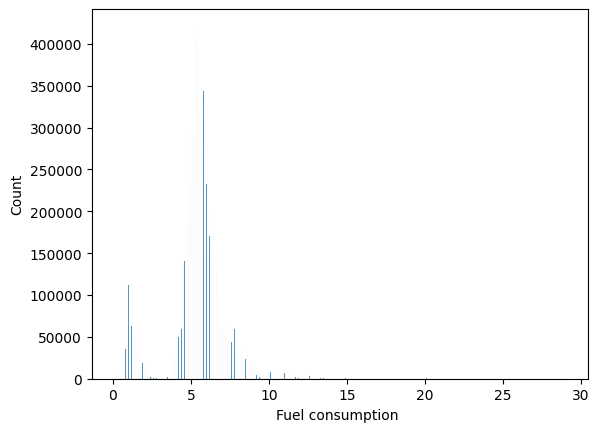

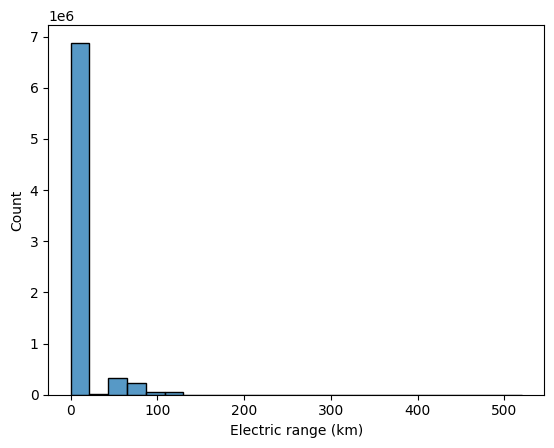

In [111]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()


### Outlier Detection

IQR Method:
Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.


##### Moved Above

In [28]:
df.head(1)

,m (kg),Ft,Fm,ec (cm3),ep (KW),Fuel consumption,Electric range (km)
0,1337.0,7.0,0.0,999.0,74.0,7.8,0.0


In [26]:
df.columns

Index(['m (kg)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'Fuel consumption ',
       'Electric range (km)'],
      dtype='object')

array([[<Axes: title={'center': 'm (kg)'}>,
        <Axes: title={'center': 'Ft'}>, <Axes: title={'center': 'Fm'}>],
       [<Axes: title={'center': 'ec (cm3)'}>,
        <Axes: title={'center': 'ep (KW)'}>,
        <Axes: title={'center': 'z (Wh/km)'}>],
       [<Axes: title={'center': 'Electric range (km)'}>, <Axes: >,
        <Axes: >]], dtype=object)

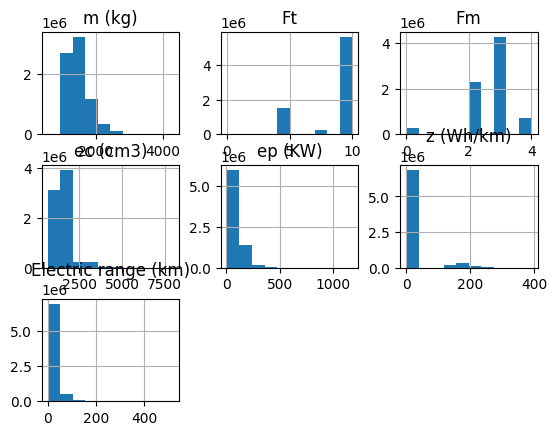

In [121]:
X.hist()

In [37]:
df.shape

(6421999, 7)

In [38]:
X.shape

(6421999, 6)

In [39]:
y.shape

(6421999,)

array([[<Axes: title={'center': 'm (kg)'}>,
        <Axes: title={'center': 'Ft'}>, <Axes: title={'center': 'Fm'}>],
       [<Axes: title={'center': 'ec (cm3)'}>,
        <Axes: title={'center': 'ep (KW)'}>,
        <Axes: title={'center': 'z (Wh/km)'}>],
       [<Axes: title={'center': 'Electric range (km)'}>, <Axes: >,
        <Axes: >]], dtype=object)

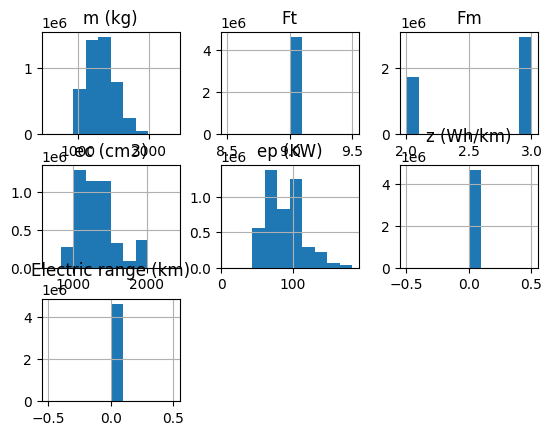

In [123]:
X.hist()

In [37]:
X.head()

,m (kg),Ft,Fm,ec (cm3),ep (KW),Electric range (km)
0,1337.0,lpg,B,999.0,74.0,0.0
1,1670.0,petrol,H,2487.0,131.0,0.0
3,1493.0,petrol,M,1199.0,96.0,0.0
4,1649.0,petrol,H,1598.0,132.0,0.0
5,1560.0,petrol,H,1987.0,112.0,0.0


## Models Development

1. Linear Regression
2. Decision Trees
3. Random Forest
4. Gradient Boosting Machines (GBM)
5. Support Vector Machines (SVM)
6. Neural Networks

In [41]:
df.head()

,m (kg),Ft,Fm,ec (cm3),ep (KW),Fuel consumption,Electric range (km)
0,1337.0,lpg,B,999.0,74.0,7.8,0.0
1,1670.0,petrol,H,2487.0,131.0,5.5,0.0
3,1493.0,petrol,M,1199.0,96.0,6.0,0.0
4,1649.0,petrol,H,1598.0,132.0,5.8,0.0
5,1560.0,petrol,H,1987.0,112.0,5.2,0.0


In [50]:
df.isna().sum()

m (kg)                 0
Ft                     0
Fm                     0
ec (cm3)               0
ep (KW)                0
Fuel consumption       0
Electric range (km)    0
dtype: int64

In [70]:
X.head()

,m (kg),Ft,Fm,ec (cm3),ep (KW),Electric range (km)
0,1337.0,lpg,B,999.0,74.0,0.0
1,1670.0,petrol,H,2487.0,131.0,0.0
3,1493.0,petrol,M,1199.0,96.0,0.0
4,1649.0,petrol,H,1598.0,132.0,0.0
5,1560.0,petrol,H,1987.0,112.0,0.0


In [74]:
Xtrain, Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.3)

## Linear Regression

In [112]:
linear_reg = Pipeline(steps=[
    ('preprocessor',preprocess),
    ('LinearRegression',LinearRegression())
])
linear_reg.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fm', 'Ft']),
                                                 ('scale_trasform',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler()),
                                                                  ('Transformer',
                                                                   QuantileTransformer())]),
                                                  ['m (kg)', 'ec (cm3)',
                                                   'ep (KW)'])])),
                ('LinearRegression', LinearRegression())])

In [113]:
lin_pred = linear_reg.predict(Xtest)

## Model Evaluation

In [115]:
r2_score(ytest,lin_pred)

0.5862991237588857

In [116]:
mean_absolute_error(ytest,lin_pred)

0.4059857970062504

In [117]:
mean_squared_error(ytest,lin_pred)

0.31863699813771434

In [118]:
explained_variance_score(ytest,lin_pred)

0.5862992532279565

In [119]:
print("root_mean_squarred_error: ",mean_squared_error(ytest,lin_pred)**1/2)

root_mean_squarred_error:  0.15931849906885717


In [121]:
import pickle
with open('lin_regression2.pkl','wb') as file:
    pickle.dump(linear_reg,file)

## Decision Tree

In [122]:
des_reg = Pipeline(
    steps=[
        ('preprocess',preprocess),
        ('Decison Tree',DecisionTreeRegressor())
    ]
)
des_reg.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fm', 'Ft']),
                                                 ('scale_trasform',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler()),
                                                                  ('Transformer',
                                                                   QuantileTransformer())]),
                                                  ['m (kg)', 'ec (cm3)',
                                                   'ep (KW)'])])),
                ('Decison Tree', DecisionTreeRegressor())])

In [123]:
dec_pred = des_reg.predict(Xtest)

## Model Evaluation

In [124]:
mean_absolute_error(ytest,dec_pred)

0.11274930888549611

In [125]:
mean_squared_error(ytest,dec_pred)

0.05108927424032866

In [126]:
explained_variance_score(ytest,dec_pred)

0.9336684895958434

In [127]:
print("root_mean_squarred_error: ",mean_squared_error(ytest,dec_pred)**1/2)

root_mean_squarred_error:  0.02554463712016433


In [128]:
r2_score(ytest,dec_pred)

0.9336684765319947

In [129]:
with open('descison_reg.pkl','wb') as file:
    pickle.dump(des_reg,file)

## Random Forest

In [130]:
rfr = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('rfr',RandomForestRegressor())
]
)
rfr.set_params(rfr__n_estimators=200,rfr__max_depth=50)
rfr.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fm', 'Ft']),
                                                 ('scale_trasform',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler()),
                                                                  ('Transformer',
                                                                   QuantileTransformer())]),
                                                  ['m (kg)', 'ec (cm3)',
                                                   'ep (KW)'])])),
                ('rfr', RandomForestRegressor(max_depth=50, n_estimators=200))])

In [131]:
rfr_pred = rfr.predict(Xtest)

## Evaluation

In [132]:
r2_score(ytest,rfr_pred)



0.9339695407632396

In [133]:
mean_absolute_error(ytest,rfr_pred)

0.11277487273173525

In [134]:
mean_squared_error(ytest,rfr_pred)

0.05085739123403162

In [135]:
explained_variance_score(ytest,rfr_pred)

0.9339695597272314

In [136]:
print("root_mean_squarred_error: ",mean_squared_error(ytest,rfr_pred)**1/2)

root_mean_squarred_error:  0.02542869561701581


In [137]:

with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rfr, file)

In [ ]:
# svr = SVR()
# svr.fit(Xtrain,ytrain)


In [ ]:
# svr_pred = svr.predict(Xtest)

In [ ]:
# r2_score(ytest,svr_pred)

In [ ]:
# mean_absolute_error(ytest,svr_pred)

In [ ]:
# mean_squared_error(ytest,svr_pred)

In [ ]:
# explained_variance_score(ytest,svr_pred)

In [ ]:
# print("root_mean_squarred_error: ",mean_squared_error(ytest,svr_pred)**1/2)

In [31]:
X1 = X
y1 = y
ordinal = OrdinalEncoder()
X1['Fm'] = ordinal.fit_transform(X1[['Fm']])
X1['Ft'] = ordinal.fit_transform(X1[['Ft']])

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=42)

## Neural Network

In [34]:
model = Sequential()
model.add(Input(shape = (x_train.shape[1],)))
model.add(Dense(128,activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256,activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='linear'))
model.add(Dense(128,activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32,activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

In [35]:
model.compile(loss='mean_squared_error',metrics=['mae'],optimizer=Adam(learning_rate=0.00001))

In [36]:
from tensorflow.keras.utils import plot_model
callback = EarlyStopping(
    monitor='val_mae',
    min_delta=0,
    patience=8,
)

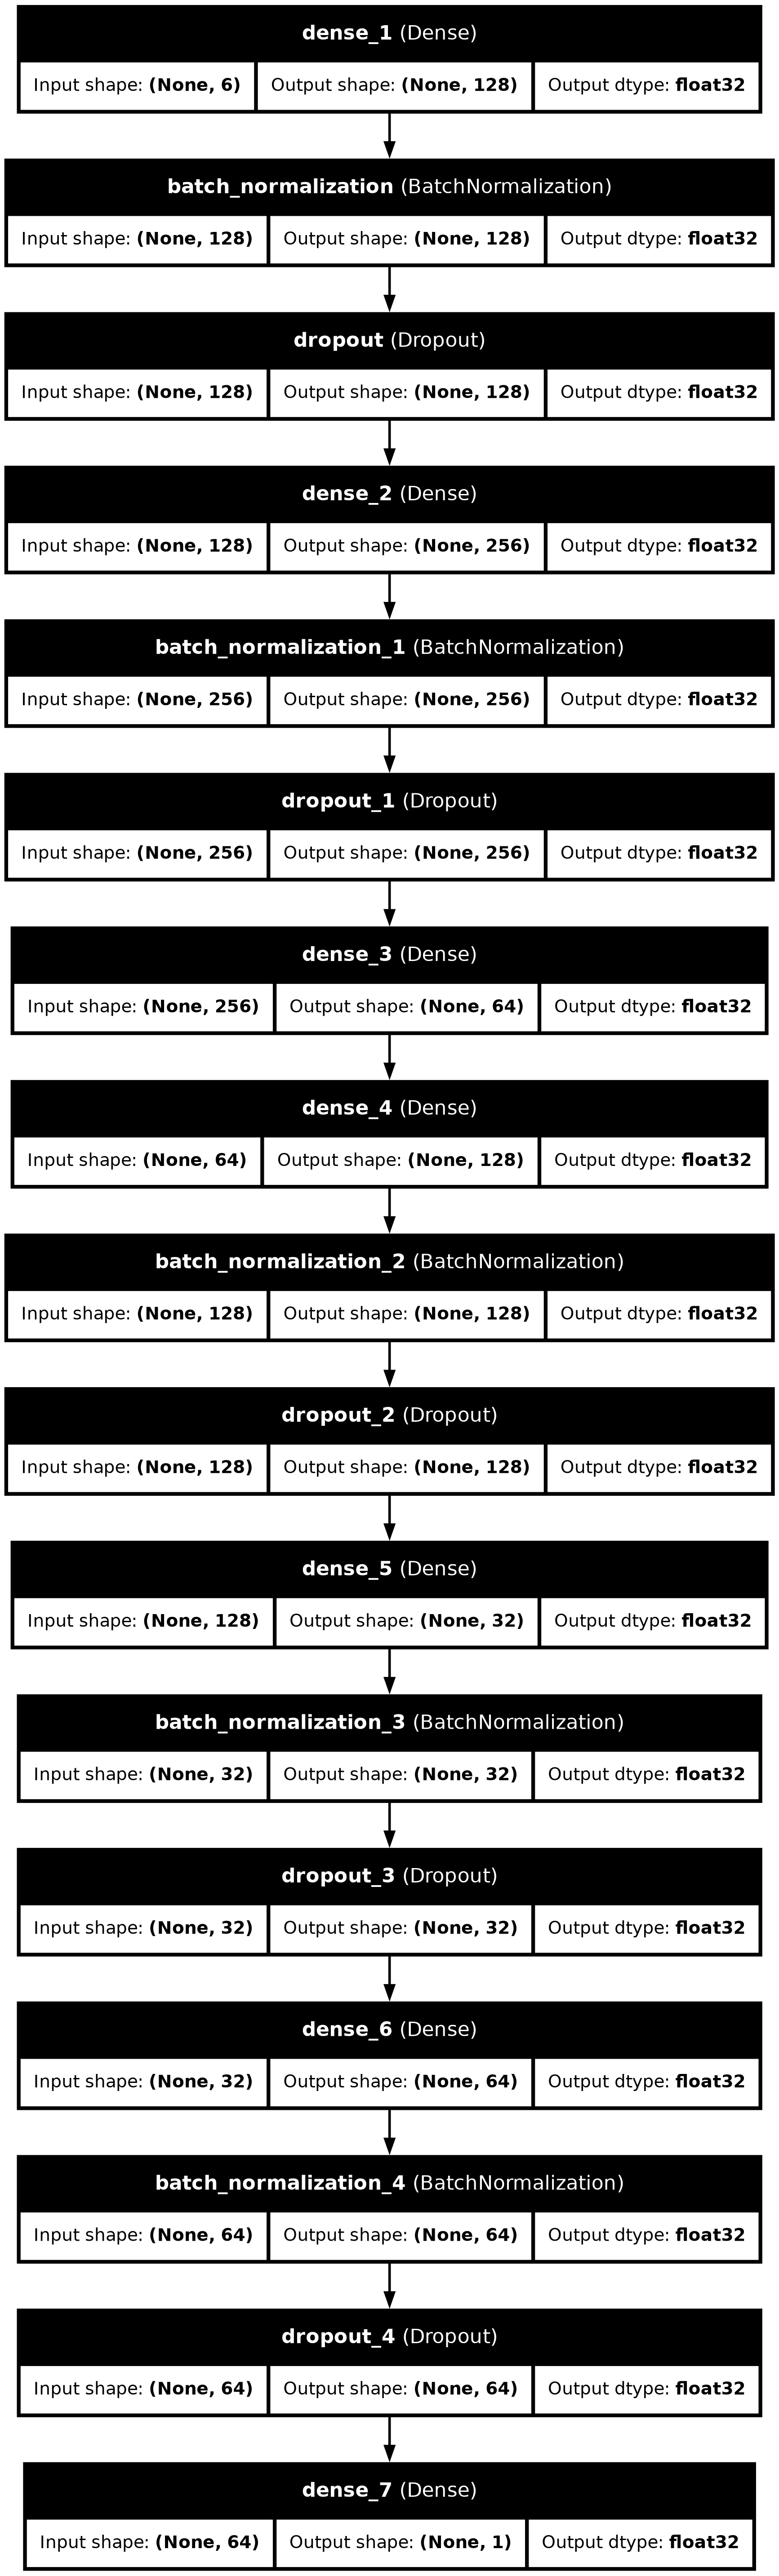

In [43]:
plot_model(model,show_shapes=True,show_layer_names=True,show_dtype=True)

In [37]:
x_train.shape

(4495399, 6)

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,425 (263.38 KB)

 Trainable params: 66,209 (258.63 KB)

 Non-trainable params: 1,216 (4.75 KB)

In [39]:
history = model.fit(x_train,y_train,epochs=100,batch_size=2048,validation_data=(x_test,y_test))

Epoch 1/100
  44/2196 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 33.3172 - mae: 5.6176 

I0000 00:00:1719762947.782791     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719762947.800980     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - loss: 32.2355 - mae: 5.5631 - val_loss: 30.1801 - val_mae: 5.4419
Epoch 2/100


W0000 00:00:1719762967.177611     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 29.4025 - mae: 5.3261 - val_loss: 26.7493 - val_mae: 5.1186
Epoch 3/100
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 26.2235 - mae: 5.0129 - val_loss: 23.6026 - val_mae: 4.8030
Epoch 4/100
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 22.6275 - mae: 4.6302 - val_loss: 19.1604 - val_mae: 4.3194
Epoch 5/100
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 18.8141 - mae: 4.1870 - val_loss: 15.0368 - val_mae: 3.8162
Epoch 6/100
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 15.0051 - mae: 3.6926 - val_loss: 11.3241 - val_mae: 3.2977
Epoch 7/100
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 11.3988 - mae: 3.1552 - val_loss: 7.9293 - val_mae: 2.7373
Epoch 8/100
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 8.1615 - mae: 2.5864 - val_loss: 4.9580 - val_mae: 2.1267
Epoch 9/100
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.5120 - mae: 2.0241 - val_loss: 2.5662 - val_mae: 1.4599
Epoch 10/100
2196/2196 ━━━━━━━━━━

<Axes: >

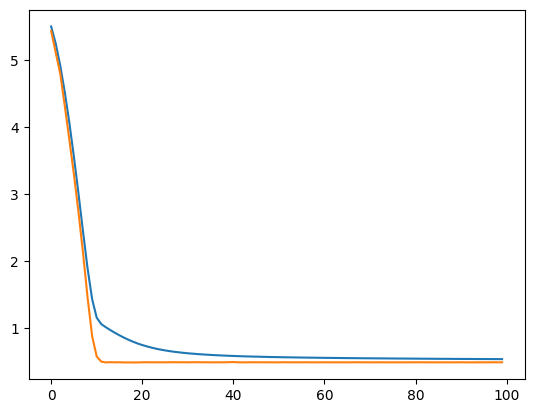

In [40]:
sns.lineplot(history.history['mae'])
sns.lineplot(history.history['val_mae'])


# Nice it worked

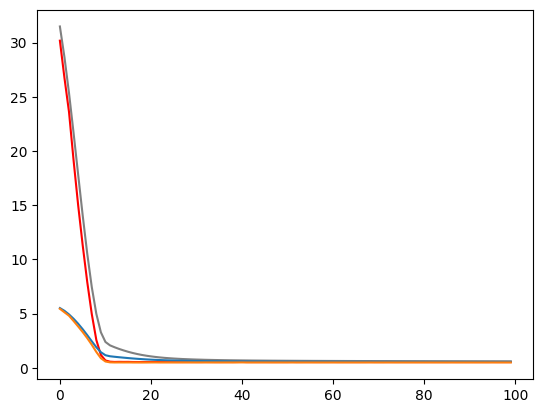

In [50]:
sns.lineplot(history.history['loss'],color='grey',legend=True)
sns.lineplot(history.history['val_loss'],color='red')
sns.lineplot(history.history['mae'])
sns.lineplot(history.history['val_mae'])
plt.show()


In [42]:
model.save("nn_aumpg.h5")

In [66]:
pred = model.predict(x_test)

60207/60207 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step


In [69]:
pred[0][0]

5.1320004

In [73]:

print(f"Predicted class: {pred.flatten()}")

Predicted class: [5.1320004 6.072755  6.0433774 ... 6.045783  5.0632296 4.838073 ]


In [74]:
check = pd.DataFrame()
check['pred'] = np.array(pred.flatten())
check['test'] = np.array(y_test)

In [99]:
mean_absolute_error(y_test,pred)

0.49161679217972076

### NN Outperformed here

In [70]:
scalar = StandardScaler()
X2 = pd.DataFrame(scalar.fit_transform(X1),columns=X1.columns)
transformer = QuantileTransformer()
X2 = pd.DataFrame(transformer.fit_transform(X1),columns=X1.columns)

In [71]:
xtrain,xtest,Ytrain,Ytest = train_test_split(X2,y1,test_size=0.3,random_state=42)

In [72]:
rfr_without_pipeline = RandomForestRegressor(n_estimators=40,max_depth=32,min_samples_leaf=4)
rfr_without_pipeline.fit(xtrain,Ytrain)

RandomForestRegressor(max_depth=32, min_samples_leaf=4, n_estimators=40)

In [73]:
prediction = rfr_without_pipeline.predict(xtest)

## Evaluation

In [76]:
r2_score(Ytest,prediction)


0.9343431167504612

In [77]:
mean_squared_error(Ytest,prediction)


0.05096335527251928

In [78]:
mean_absolute_error(Ytest,prediction)


0.11316354507154723

In [79]:
explained_variance_score(Ytest,prediction)


0.934343207294757

In [80]:
print("root_mean_squarred_error: ",mean_squared_error(Ytest,prediction)**1/2)

root_mean_squarred_error:  0.02548167763625964


## GradientBoosting

In [92]:
grad_boost = Pipeline(steps=[
    ('preprocessing',preprocess),
    ('GradBoostRegressor',GradientBoostingRegressor(
        
        learning_rate=0.0001,
        n_estimators=150,
        
       
        min_samples_split=5,
        min_samples_leaf=7,
        
        max_depth=55,
        min_impurity_decrease=0.0,
        alpha=0.9,
        verbose=0,
        max_leaf_nodes=150,
        
    ))
])

In [93]:
grad_boost.fit(xtrain,Ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fm', 'Ft']),
                                                 ('scale_trasform',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler()),
                                                                  ('Transformer',
                                                                   QuantileTransformer())]),
                                                  ['m (kg)', 'ec (cm3)',
                                                   'ep (KW)'])])),
                ('GradBoostRegressor',
                 GradientBoostingRegressor(learning_rate=0.0001, max_depth=55,
                                           max_leaf_nodes=150,
                                           min_samples_leaf=7,
                                           min_samples_split=5,
                                           n_estimators=150))])

In [94]:
grad_boost_pred = grad_boost.predict(xtest)

## Evaluation

In [95]:
r2_score(Ytest,grad_boost_pred)


0.025583891621274724

In [96]:
mean_squared_error(Ytest,grad_boost_pred)


0.7563489440373253

In [97]:
explained_variance_score(Ytest,grad_boost_pred)


0.025591973104149512

In [98]:
mean_absolute_error(Ytest,grad_boost_pred)


0.6428363717506536

In [99]:
print("root_mean_squarred_error: ",mean_squared_error(Ytest,grad_boost_pred)**1/2)

root_mean_squarred_error:  0.37817447201866267


## XGBoost

In [102]:

with open('grad_boost.pkl', 'wb') as file:
    pickle.dump(grad_boost, file)

In [104]:
xgbr = XGBRegressor()
xgbr.fit(xtrain,Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
pred_xgbr = xgbr.predict(xtest)

In [107]:
r2_score(Ytest,pred_xgbr)

0.916116513884557

In [108]:
with open('xgboost.pkl', 'wb') as file:
    pickle.dump(xgbr, file)